# Étape 1 : recuperation des données

In [47]:


# Lire les données (avec suppression des espaces inutiles autour des valeurs)
myData <- read.table("adult.csv", sep = ",", header = TRUE, stringsAsFactors = FALSE, strip.white = TRUE)

# Nombre de lignes avant nettoyage
initial_rows <- nrow(myData)

# Supprimer les lignes contenant au moins un "?"
rows_with_question <- apply(myData, 1, function(row) any(trimws(row) == "?"))
myData <- myData[!rows_with_question, ]

# Nombre de lignes après nettoyage
cleaned_rows <- nrow(myData)

# Résumé
cat("🔍 Lignes initiales :", initial_rows, "\n")
cat("🧹 Lignes supprimées :", initial_rows - cleaned_rows, "\n")
cat("✅ Lignes restantes :", cleaned_rows, "\n")


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

<U+0001F50D> Lignes initiales : 32561 
<U+0001F9F9> Lignes supprimées : 2399 
<U+2705> Lignes restantes : 30162 


In [48]:
# move to your working directory, ideally data and jupyter-notebook should be there
# setwd("C:/Users/thiba/OneDrive - HESSO/Annee_3/Semestre2/DataMining/TP1")
# check whether we moved there
# getwd()

# read the titanic data
#myData <- read.table(file = "adult.csv", sep = ",", header = T)


## supression de toute les lignes ayant un ? dedans

In [49]:
# Supprimer les lignes contenant des '?'
myData <- myData[!apply(myData, 1, function(row) any(row == "?")), ]

Affichage des collones du fichier

In [50]:
#affichage de tous les noms de colonnes
colnames(myData)

[1] "age"            "workclass"      "fnlwgt"         "education"     
 [5] "education.num"  "marital.status" "occupation"     "relationship"  
 [9] "race"           "sex"            "capital.gain"   "capital.loss"  
[13] "hours.per.week" "native.country" "income"

Affichage d'un resumer des datas

In [51]:
summary(myData)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:30162       Min.   :  13769   Length:30162      
 1st Qu.:28.00   Class :character   1st Qu.: 117627   Class :character  
 Median :37.00   Mode  :character   Median : 178425   Mode  :character  
 Mean   :38.44                      Mean   : 189794                     
 3rd Qu.:47.00                      3rd Qu.: 237629                     
 Max.   :90.00                      Max.   :1484705                     
 education.num   marital.status      occupation        relationship      
 Min.   : 1.00   Length:30162       Length:30162       Length:30162      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.12                                                           
 3rd Qu.:13.00                                                           
 Max.   :16.00                               

# Etape 2: Choix des attribues qualitatifs ayant un impact sur le revenu
###  for sure :Work class / education / occupation / specialty
### to check: native country  / race / sex

## workclass

                  income
workclass          <=50K  >50K
  Federal-gov        578   365
  Local-gov         1458   609
  Private          17410  4876
  Self-emp-inc       474   600
  Self-emp-not-inc  1785   714
  State-gov          935   344
  Without-pay         14     0

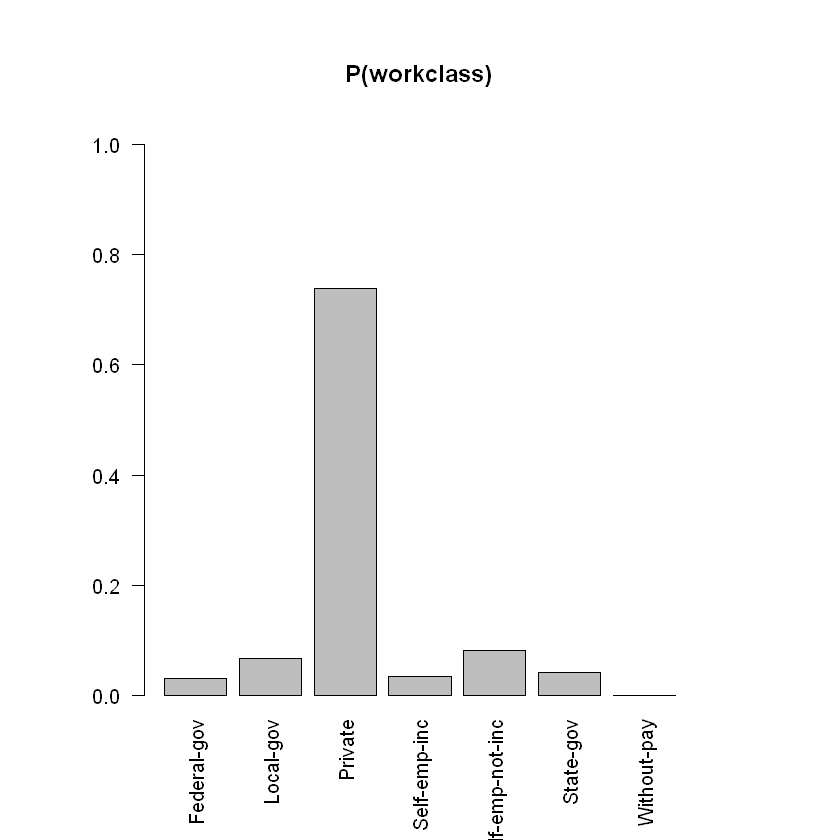

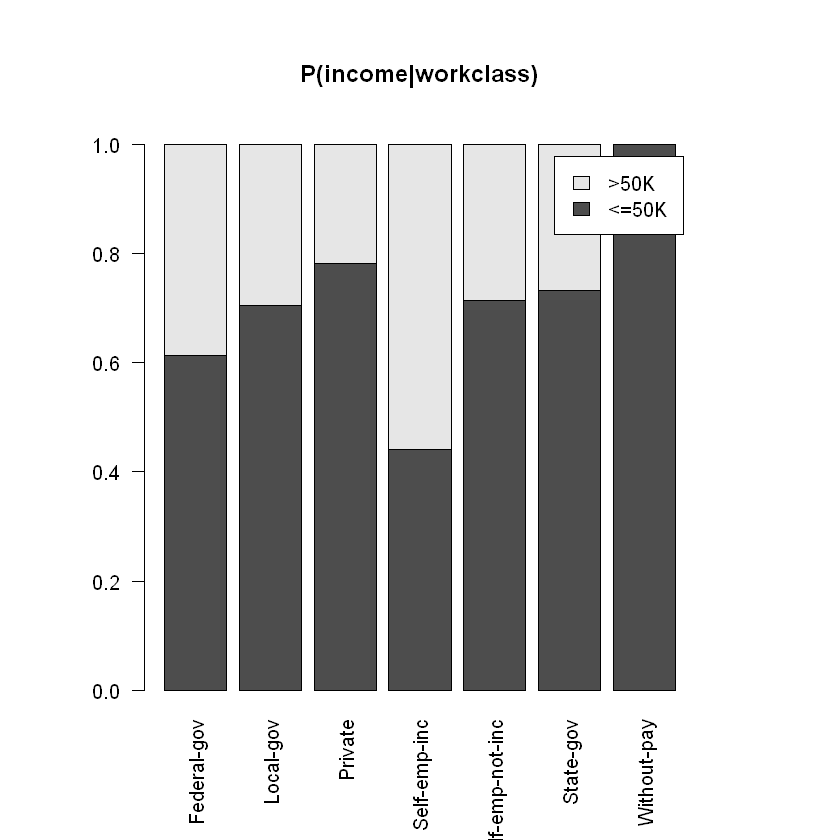

In [52]:
# dev.size()  # Affiche la taille actuelle de la fenêtre graphique
par(mar = c(6, 6, 6, 6)) # Ajuste les marges de la fenêtre graphique
table(myData[, c(2, 15)])


barplot(prop.table(table(myData[, c(2)])), main = "P(workclass)", legend = F, beside = FALSE,  las = 2,ylim = c(0,1))
barplot(t(prop.table(table(myData[, c(2, 15)]), 1)), main = "P(income|workclass)", legend = TRUE, beside = FALSE, las = 2)


## Education

              income
education      <=50K >50K
  10th           761   59
  11th           989   59
  12th           348   29
  1st-4th        145    6
  5th-6th        276   12
  7th-8th        522   35
  9th            430   25
  Assoc-acdm     752  256
  Assoc-voc      963  344
  Bachelors     2918 2126
  Doctorate       95  280
  HS-grad       8223 1617
  Masters        709  918
  Preschool       45    0
  Prof-school    136  406
  Some-college  5342 1336

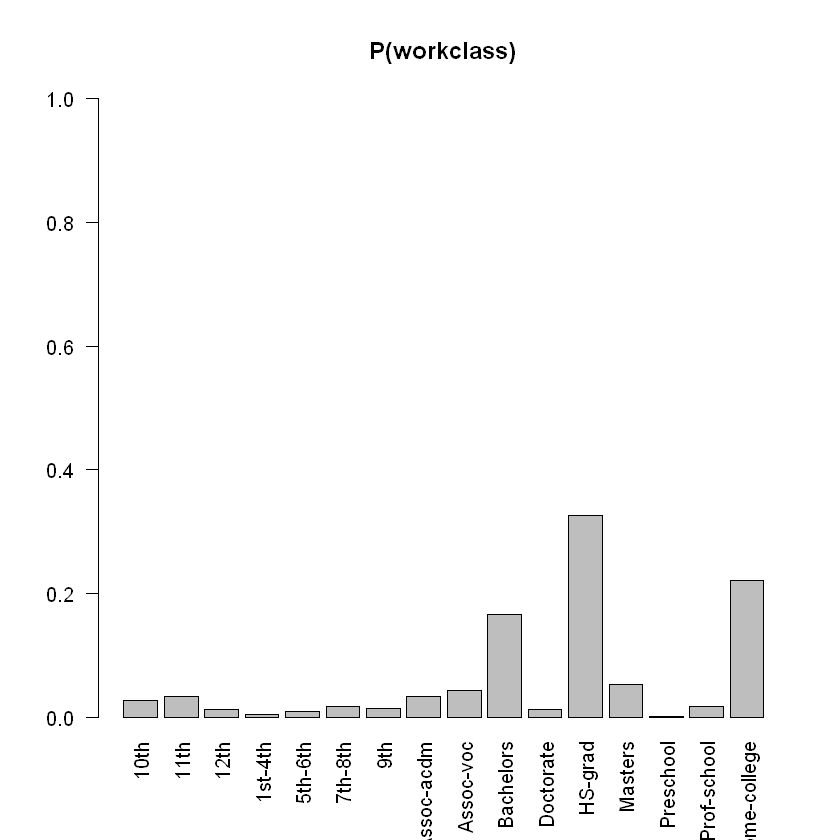

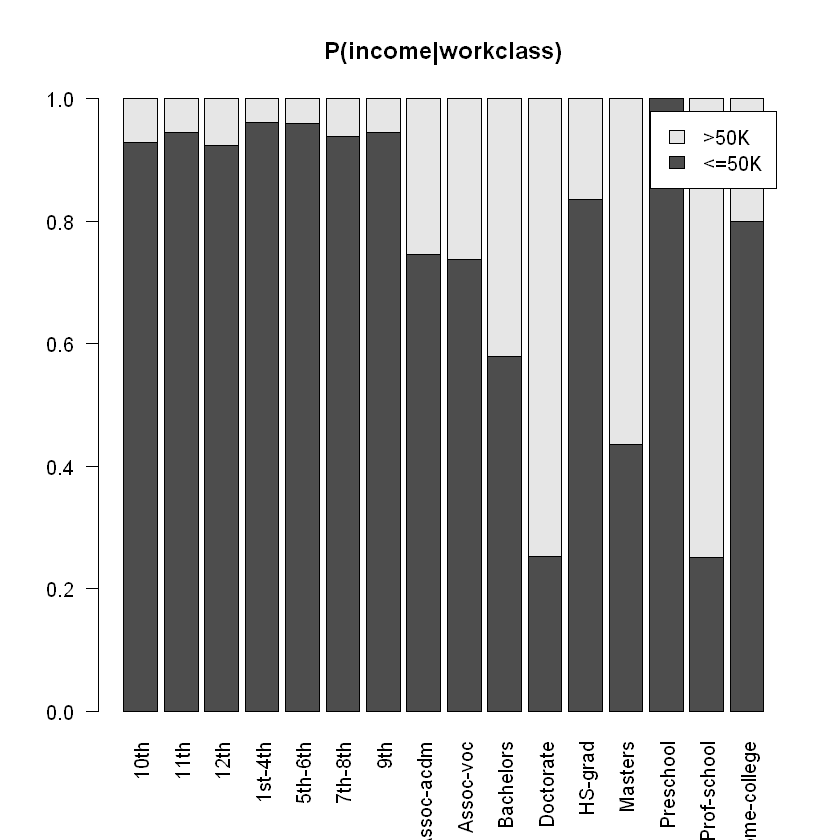

In [53]:
table(myData[, c(4, 15)])


barplot(prop.table(table(myData[, c(4)])), main = "P(workclass)", legend = F, beside = FALSE, las = 2,ylim = c(0,1))
barplot(t(prop.table(table(myData[, c(4, 15)]), 1)), main = "P(income|workclass)", legend = TRUE, beside = FALSE,  las = 2)


## Occupation

                   income
occupation          <=50K >50K
  Adm-clerical       3223  498
  Armed-Forces          8    1
  Craft-repair       3122  908
  Exec-managerial    2055 1937
  Farming-fishing     874  115
  Handlers-cleaners  1267   83
  Machine-op-inspct  1721  245
  Other-service      3080  132
  Priv-house-serv     142    1
  Prof-specialty     2227 1811
  Protective-serv     434  210
  Sales              2614  970
  Tech-support        634  278
  Transport-moving   1253  319


     Adm-clerical      Armed-Forces      Craft-repair   Exec-managerial 
     0.1233671507      0.0002983887      0.1336118295      0.1323519660 
  Farming-fishing Handlers-cleaners Machine-op-inspct     Other-service 
     0.0327896028      0.0447583052      0.0651813540      0.1064916120 
  Priv-house-serv    Prof-specialty   Protective-serv             Sales 
     0.0047410649      0.1338770639      0.0213513693      0.1188250116 
     Tech-support  Transport-moving 
     0.0302367217      0.0521185598 

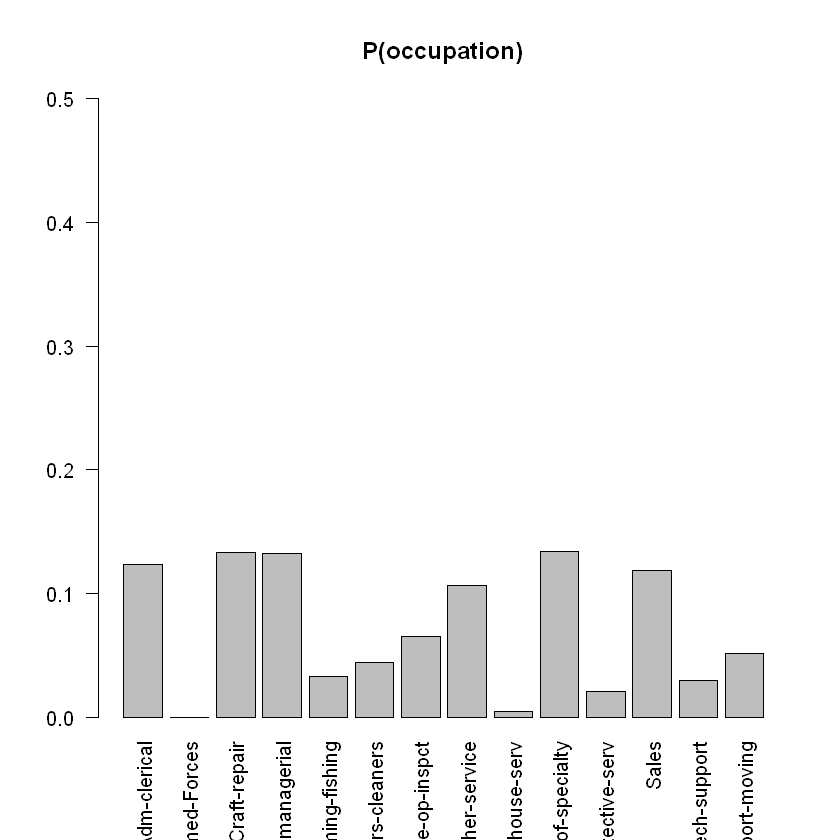

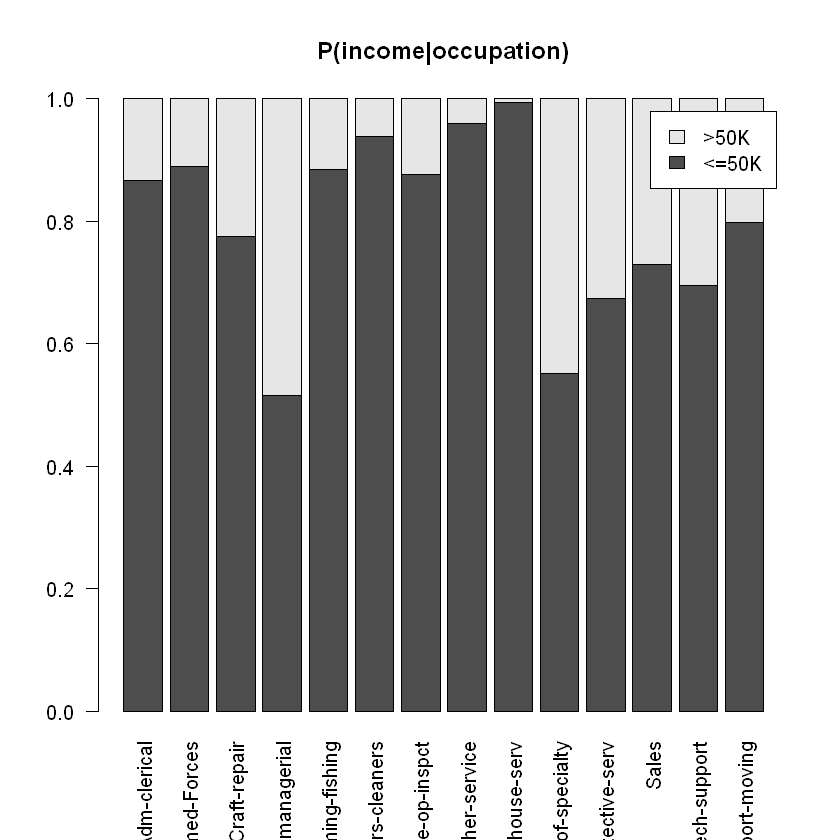

In [54]:
table(myData[, c(7, 15)])
prop.table(table(myData[, c(7)]))


barplot(prop.table(table(myData[, c(7)])), main = "P(occupation)", legend = F, beside = FALSE, las = 2,ylim = c(0,0.5))
barplot(t(prop.table(table(myData[, c(7, 15)]), 1)), main = "P(income|occupation)", legend = TRUE, beside = FALSE,  las = 2)


## Native country

                            income
native.country               <=50K  >50K
  Cambodia                      11     7
  Canada                        71    36
  China                         48    20
  Columbia                      54     2
  Cuba                          67    25
  Dominican-Republic            65     2
  Ecuador                       23     4
  El-Salvador                   91     9
  England                       56    30
  France                        15    12
  Germany                       84    44
  Greece                        21     8
  Guatemala                     60     3
  Haiti                         38     4
  Holand-Netherlands             1     0
  Honduras                      11     1
  Hong                          13     6
  Hungary                       10     3
  India                         60    40
  Iran                          24    18
  Ireland                       19     5
  Italy                         44    24
  Jamaica             


                  Cambodia                     Canada 
              0.0005967774               0.0035475101 
                     China                   Columbia 
              0.0022544924               0.0018566408 
                      Cuba         Dominican-Republic 
              0.0030501956               0.0022213381 
                   Ecuador                El-Salvador 
              0.0008951661               0.0033154300 
                   England                     France 
              0.0028512698               0.0008951661 
                   Germany                     Greece 
              0.0042437504               0.0009614747 
                 Guatemala                      Haiti 
              0.0020887209               0.0013924806 
        Holand-Netherlands                   Honduras 
              0.0000331543               0.0003978516 
                      Hong                    Hungary 
              0.0006299317               0.0004310059 
         

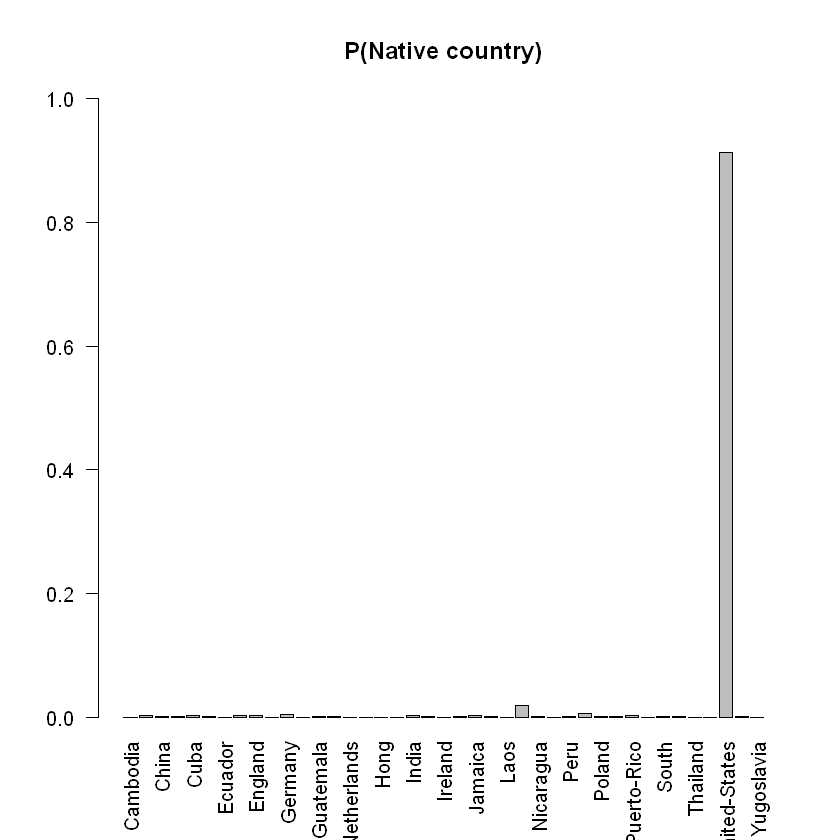

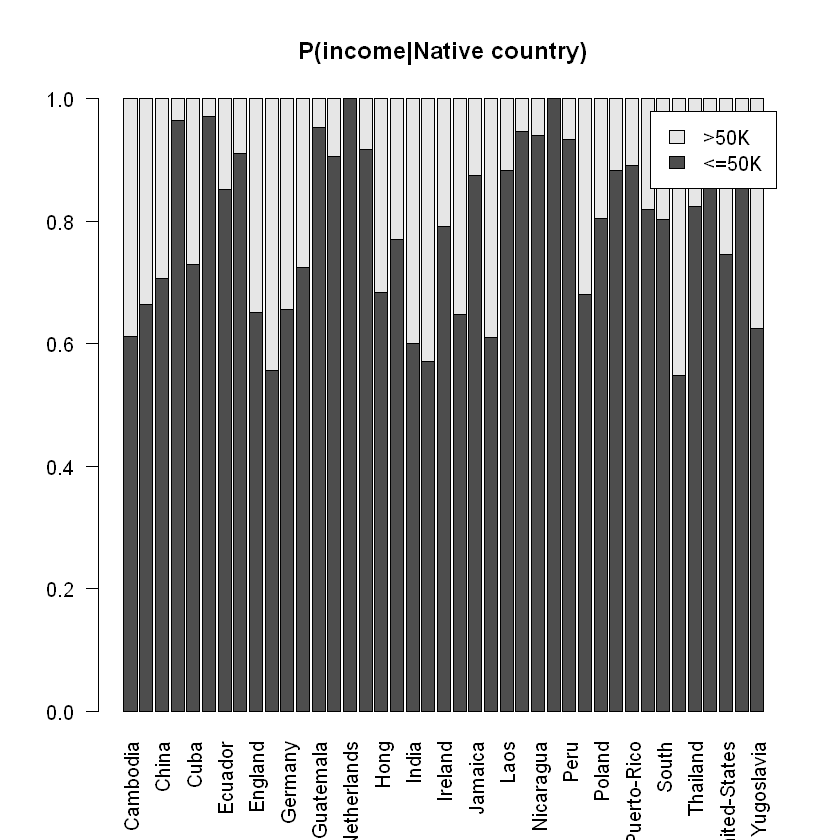

In [55]:
table(myData[, c(14, 15)])
prop.table(table(myData[, c(14)]))


barplot(prop.table(table(myData[, c(14)])), main = "P(Native country)", legend = F, beside = FALSE, las = 2,ylim = c(0,1))
barplot(t(prop.table(table(myData[, c(14, 15)]), 1)), main = "P(income|Native country)", legend = TRUE, beside = FALSE,  las = 2)
